# Note:

We faced some issues in detection when we used Batch normalization during the test time. The zebras in the left of the image, though detected but were classified as background. This problem arises because we are only testing on a very small batch (in our case its only one image). After we converted the batch normalization layer to default (basically not use it), we got our predictions accurate.

Moreover the bounding box allignemnt when not using batch normalization are more accurate.

In [1]:
import sys
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import logging
logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")

import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.visualize import Visualize

from MaskRCNN.inference import Inference

%matplotlib inline 

pretrained_weights_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
save_dir = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/'

Using TensorFlow backend.


In [2]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run fcn_rpn_proposal generation

In [3]:
obj_inference = Inference(pretrained_weights_path, run='fpn_rcn_proposals', save=True, save_dir=save_dir, DEBUG=False)
feature_maps, proposals, image_metas = obj_inference.get_feature_maps_and_proposals()
print (len(feature_maps), proposals.shape, image_metas)

(process_images) Image Resized Nnormalized: (shape)  (1, 1024, 1024, 3)
(process_images) Image meta: (shape)  (1, 13)
(process_images) Image Window: (shape)  (1, 4)
(process_images) Anchors: (shape)  (1, 261888, 4)
(INPUT IMAGE) Shape of input image batch:  (1024, 1024, 3)
(IMAGE META) Image Metas:  [['3627527276_6fe8cd9bfe_z' '476' '640' '3' '1024' '1024' '3' '131' '0'
  '893' '1024' '1.6' '0']]
(ANCHORS):  (1, 261888, 4)
(FPN) C2: (shape)  (?, 256, 256, 256)
(FPN) C3: (shape)  (?, 128, 128, 512)
(FPN) C4: (shape)  (?, 64, 64, 1024)
(FPN) C5: (shape)  (?, 32, 32, 2048)
(FPN) P2: (shape)  (?, 256, 256, 256)
(FPN) P3: (shape)  (?, 128, 128, 256)
(FPN) P4: (shape)  (?, 64, 64, 256)
(FPN) P5: (shape)  (?, 32, 32, 256)
(FPN) P6: (shape)  (?, 16, 16, 256)
(RPN) Class Logits (shape)  (?, ?, 2)
(RPN) Class Probs (shape)  (?, ?, 2)
(RPN) Bbox (shape)  (?, ?, 4)
(Proposals) Proposals (shape)  (1, ?, ?)
RUNNING FPN ..............
(FPN) P2=(1, 256, 256, 256), P3=(1, 128, 128, 256), P4=(1, 64, 64,

## Run mrcnn_detections generation

In [4]:
obj_inference = Inference(pretrained_weights_path, run='mrcnn_detection', save=True, save_dir=save_dir, DEBUG=False)
mrcnn_class_probs, mrcnn_bbox, detections, detection_unmold = obj_inference.get_mrcnn_prob_bbox_and_detections()

Max and Min Proposals,  1.0 0.0
Num NaN present in Proposals  0
(MRCNN) feature_map (len)  4
(MRCNN) proposals (shape)  (1, 1000, 4)
1 [[476 640   3]] [[1024 1024    3]] [[ 131    0  893 1024]]
(MRCNN) Pooled Roi's (shape) (1, ?, 7, 7, 256)
p909u894ur84r4r4hruh4i8r4  81
window  [[ 0.12805474  0.          0.87194526  1.        ]]
(MASK RCNN) mrcnn_class_probs (shape) (1, 1000, 81)
(MASK RCNN) mrcnn_bbox (shape) (1, 1000, 81, 4)
(DETECTION) detections (shape) (1, 100, 6)
image_shape  [1024 1024    3]
original_image_shape  [476 640   3]
image_window  [ 131    0  893 1024]
RUNNING utils (denorm_boxes)......................
[[215 411 295 622]
 [232  47 395 163]
 [238 255 271 342]
 [234  99 342 215]]


## Vizualize Detections

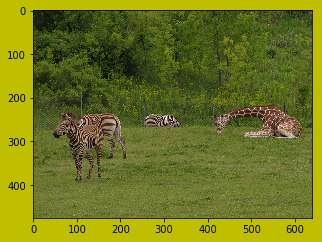

In [5]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'
Visualize(img_path).vizualize_image()

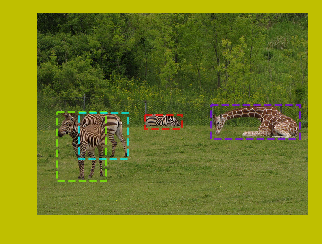

In [6]:
Visualize(img_path).visualize_boxes(boxes=detection_unmold[0], class_names=class_names)

## ROUGH

In [7]:
import tensorflow as tf
import numpy as np

a = tf.constant([[1,2,3],[3,4,5],[5,6,np.nan]])
v = tf.where(tf.is_nan(a), tf.zeros(shape=[3,3], dtype=tf.float32), a)


In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    s,b_ = sess.run([a,v])
    print (s)
    print (b_)

[[  1.   2.   3.]
 [  3.   4.   5.]
 [  5.   6.  nan]]
[[ 1.  2.  3.]
 [ 3.  4.  5.]
 [ 5.  6.  0.]]


In [9]:
v = tf.constant([np.nan, np.nan, 2])                  # initialize a variable as nan  
v = tf.where(tf.is_nan(v), [0.,0,0], v)

with tf.Session() as sess:    
    print(sess.run(v))

[ 0.  0.  2.]


In [10]:
a  = tf.constant([[[1,0], [0,1], [1,0]]])
b = tf.arg_max(a, -1)
x = tf.gather_nd(a, b)

with tf.Session() as sess:
    c = sess.run(a)
    d = sess.run(b)
    y = sess.run(x)
    print (c.shape)
    print(d)
    print (y)

Instructions for updating:
Use `argmax` instead
(1, 3, 2)
[[0 1 0]]
[0]


In [11]:
import keras.backend as K
import tensorflow as tf
a  = tf.constant([[1, -1, 0, 0, 1, -1]])
b = tf.constant([[1,2,3,4,5, 6]])
c = K.cast(K.equal(a, 1), tf.int32)
d = K.cast(K.equal(a, -1), tf.int32)
# # Positive and Negative anchors contribute to the loss,
# # but neutral anchors (match value = 0) don't.
indices = tf.where(K.not_equal(a, 0))
# # Pick rows that contribute to the loss and filter out the rest.
rpn_class_logits = tf.gather_nd(a, indices)
anchor_class = tf.gather_nd(c, indices)
m_gathered = tf.gather_nd(b, indices)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    aa = sess.run(a)
    bb = sess.run(b)
    cc = sess.run(c)
    dd = sess.run(d)
    ee = sess.run(indices)
    ff = sess.run(rpn_class_logits)
    gg = sess.run(anchor_class)
    hh = sess.run(m_gathered)
    print(aa)
    print ('')
    print(bb)
    print('')
    print(cc)
    print('')
    print(dd)
    print('')
    print(ee)
    print('')
    print(ff)
    print('')
    print(gg)
    print('')
    print(hh)

[[ 1 -1  0  0  1 -1]]

[[1 2 3 4 5 6]]

[[1 0 0 0 1 0]]

[[0 1 0 0 0 1]]

[[0 0]
 [0 1]
 [0 4]
 [0 5]]

[ 1 -1  1 -1]

[1 0 1 0]

[1 2 5 6]


In [13]:
a = np.array([[1,2],[2,3]])
a.shape

(2, 2)

In [14]:
np.newaxis

In [15]:
import keras.backend as K
import tensorflow as tf

tf.reset_default_graph()

a = tf.constant([[1, -1, 0, 0, 1, -1]])
b = tf.constant([[1, 2, 3, 4, 5, 6]])
indices = tf.where(tf.not_equal(a, 0))
a_nw = tf.gather_nd(a, indices)
indices_n = tf.where(tf.not_equal(a_nw, 1))

ao = tf.cast(tf.equal(a_nw, 1), tf.int32)
# aoo = tf.gather_nd(a_nw, ao)
# a_nw_n = tf.aassign(a_nw, indices)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    aa = sess.run(a)
    bb = sess.run(indices)
    as_n = sess.run(a_nw)
    indices_nn = sess.run(indices_n)
    ao_ = sess.run(ao)
#     aoo_ = sess.run(aoo)
    print(aa)
    print('')
    print(bb)
    print ('')
    print(as_n)
    print ('')
    print(indices_nn)
    print('')
    print(ao_)
#     print('')
#     print (aoo_)
    

[[ 1 -1  0  0  1 -1]]

[[0 0]
 [0 1]
 [0 4]
 [0 5]]

[ 1 -1  1 -1]

[[1]
 [3]]

[1 0 1 0]
